In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

In [3]:
from sklearn.model_selection import GridSearchCV

In [4]:
np.random.seed(42)

# Base

In [5]:
# Importando a base
train = pd.read_csv('train_treated.csv', index_col=0)

## Dividindo entre treino e teste

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train.drop(columns=['Survived']), train['Survived'], test_size=0.25, random_state=0)

# Criando dicionario de scores

In [7]:
metrics_dict = {}

In [8]:
def update_score_dict(name, predict, classifier):
    metrics_dict[name] = {
        'label': name, 
        'accuracy': metrics.accuracy_score(predict, y_test), 
        'recall': metrics.recall_score(predict, y_test), 
        'precision': metrics.precision_score(predict, y_test), 
        'F1': metrics.f1_score(predict, y_test),
        'predict': predict,
        'classifier': classifier
    }

# Plot Matriz de Confusão

In [9]:
def plot_CM(classifier):
    fig, ax = plt.subplots(figsize=(2, 2))
    plot_confusion_matrix(classifier, x_test, y_test, cmap=plt.cm.Blues, values_format = '', ax=ax)
    plt.show()

# LogisticRegression

In [10]:
# Importando
from sklearn.linear_model import LogisticRegression
# Instanciando
logisticR = LogisticRegression(max_iter=350)

In [11]:
logisticR.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 350,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## Default

In [12]:
# Treinando e prevendo
logisticR.fit(x_train, y_train)
logisticR_predict = logisticR.predict(x_test)

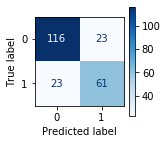

In [13]:
plot_CM(logisticR)

In [14]:
update_score_dict('Logistic default', logisticR_predict, logisticR)
pd.DataFrame(metrics_dict.values())

,label,accuracy,recall,precision,F1,predict,classifier
0,Logistic default,0.793722,0.72619,0.72619,0.72619,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","LogisticRegression(C=1.0, class_weight=None, d..."


## Grid Search

In [15]:
rand_RL = np.random.uniform(low=0, high=1, size=(100,))
rand_RL

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258,
       0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497,
       0.18340451, 0.30424224, 0.52475643, 0.43194502, 0.29122914,
       0.61185289, 0.13949386, 0.29214465, 0.36636184, 0.45606998,
       0.78517596, 0.19967378, 0.51423444, 0.59241457, 0.04645041,
       0.60754485, 0.17052412, 0.06505159, 0.94888554, 0.96563203,
       0.80839735, 0.30461377, 0.09767211, 0.68423303, 0.44015249,
       0.12203823, 0.49517691, 0.03438852, 0.9093204 , 0.25877998,
       0.66252228, 0.31171108, 0.52006802, 0.54671028, 0.18485446,
       0.96958463, 0.77513282, 0.93949894, 0.89482735, 0.59789998,
       0.92187424, 0.0884925 , 0.19598286, 0.04522729, 0.32533033,
       0.38867729, 0.27134903, 0.82873751, 0.35675333, 0.28093451,
       0.54269608, 0.14092422, 0.80219698, 0.07455064, 0.98688694,
       0.77224477, 0.19871568, 0.00552212, 0.81546143, 0.70685

In [16]:
logisticR_param_grid = {
    'penalty' : ['l1', 'l2'],
    'C' : rand_RL,
    'solver' : ['liblinear', 'lbfgs', 'newton-cg']
}

logisticR_gridsearch = GridSearchCV(logisticR, param_grid = logisticR_param_grid, scoring="accuracy", n_jobs=4, verbose = 1)

logisticR_gridsearch.fit(x_train, y_train)

logisticR_best = logisticR_gridsearch.best_estimator_

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  92 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 3000 out of 3000 | elapsed:    8.1s finished


In [17]:
logisticR_best

LogisticRegression(C=0.045227288910538066, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=350, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
logisticR_predict_gs = logisticR_best.predict(x_test)

In [19]:
update_score_dict('Logistic GS', logisticR_predict_gs, logisticR_best)
pd.DataFrame(metrics_dict.values())

,label,accuracy,recall,precision,F1,predict,classifier
0,Logistic default,0.793722,0.726190,0.726190,0.726190,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","LogisticRegression(C=1.0, class_weight=None, d..."
1,Logistic GS,0.802691,0.777778,0.666667,0.717949,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","LogisticRegression(C=0.045227288910538066, cla..."


# Máquina de Vetor Suporte

In [20]:
# Importando
from sklearn.svm import SVC
# Instanciando
supportV = SVC(probability=True)

In [21]:
supportV.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## Default

In [22]:
# Treinando e prevendo com default
supportV.fit(x_train, y_train)
supportV_predict = supportV.predict(x_test)

In [23]:
update_score_dict('SVM default', supportV_predict, supportV)
pd.DataFrame(metrics_dict.values())

,label,accuracy,recall,precision,F1,predict,classifier
0,Logistic default,0.793722,0.726190,0.726190,0.726190,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","LogisticRegression(C=1.0, class_weight=None, d..."
1,Logistic GS,0.802691,0.777778,0.666667,0.717949,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","LogisticRegression(C=0.045227288910538066, cla..."
2,SVM default,0.721973,0.823529,0.333333,0.474576,"[0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, ...","SVC(C=1.0, break_ties=False, cache_size=200, c..."


## Grid Search

In [24]:
rand_svm = np.random.uniform(low=0, high=700, size=(300,))
rand_svm

array([445.48728788, 220.04918675, 355.99948382, 635.29653175,
       174.5045604 , 287.26804612, 528.88579698, 160.15871584,
        53.88593688, 202.82601704, 112.85490108, 650.78835664,
       565.6842657 , 443.38262956, 610.02241313, 562.57045383,
       130.59904122, 624.79129894, 377.53956934, 565.20810861,
       627.26390995, 222.60243248,  77.03634717, 159.55461378,
       298.97545204, 572.61033615, 602.51140828,   4.86649137,
       357.5231118 , 292.1877022 , 155.47546733,  83.90575713,
       236.33061998, 660.03679274, 226.24205241, 363.15343522,
       492.11327123, 254.54072167, 680.2474579 , 673.71310646,
       176.24760708, 348.07395412, 210.61481687, 199.38834606,
        25.82086315, 426.69503379, 351.87531626,  36.03512587,
       195.05252497, 635.78612018, 167.69332347, 101.42641046,
       342.61693219, 689.95531788, 169.43869006, 470.49488318,
       533.13373073, 166.34628079, 509.75144403, 257.4481929 ,
       442.61408142, 443.47079753, 375.04227885,  63.20

In [25]:
supportV_param_grid = {
    'gamma': ['scale', 'auto'],
    'C': rand_svm
}

supportV_gridsearch = GridSearchCV(supportV, param_grid = supportV_param_grid, scoring="accuracy", n_jobs=4, verbose = 1)

supportV_gridsearch.fit(x_train, y_train)

supportV_best = supportV_gridsearch.best_estimator_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 600 candidates, totalling 3000 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:    8.8s
[Parallel(n_jobs=4)]: Done 876 tasks      | elapsed:   20.2s
[Parallel(n_jobs=4)]: Done 1576 tasks      | elapsed:   37.0s
[Parallel(n_jobs=4)]: Done 2592 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 3000 out of 3000 | elapsed:  1.2min finished


In [26]:
supportV_best

SVC(C=492.1132712266245, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [27]:
supportV_predict_gs = supportV_best.predict(x_test)

In [28]:
update_score_dict('SVM GS', supportV_predict_gs, supportV_best)
pd.DataFrame(metrics_dict.values())

,label,accuracy,recall,precision,F1,predict,classifier
0,Logistic default,0.793722,0.726190,0.726190,0.726190,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","LogisticRegression(C=1.0, class_weight=None, d..."
1,Logistic GS,0.802691,0.777778,0.666667,0.717949,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","LogisticRegression(C=0.045227288910538066, cla..."
2,SVM default,0.721973,0.823529,0.333333,0.474576,"[0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, ...","SVC(C=1.0, break_ties=False, cache_size=200, c..."
3,SVM GS,0.784753,0.714286,0.714286,0.714286,"[0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, ...","SVC(C=492.1132712266245, break_ties=False, cac..."


# Decision tree

In [29]:
# Importando
from sklearn.tree import DecisionTreeClassifier
# Instanciando
decisionT = DecisionTreeClassifier(random_state=42)

In [30]:
decisionT.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

## Default

In [31]:
# Treinando e prevendo
decisionT.fit(x_train, y_train)
decisionT_predict = decisionT.predict(x_test)

In [32]:
update_score_dict('Decision default', decisionT_predict, decisionT)
pd.DataFrame(metrics_dict.values())

,label,accuracy,recall,precision,F1,predict,classifier
0,Logistic default,0.793722,0.726190,0.726190,0.726190,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","LogisticRegression(C=1.0, class_weight=None, d..."
1,Logistic GS,0.802691,0.777778,0.666667,0.717949,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","LogisticRegression(C=0.045227288910538066, cla..."
2,SVM default,0.721973,0.823529,0.333333,0.474576,"[0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, ...","SVC(C=1.0, break_ties=False, cache_size=200, c..."
3,SVM GS,0.784753,0.714286,0.714286,0.714286,"[0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, ...","SVC(C=492.1132712266245, break_ties=False, cac..."
4,Decision default,0.753363,0.670588,0.678571,0.674556,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, ...","DecisionTreeClassifier(ccp_alpha=0.0, class_we..."


## Grid Search

In [33]:
rand_DT = np.random.uniform(low=4, high=12, size=(50,))
rand_DT = list(rand_DT)
rand_DT.append(None)
rand_DT

[8.274619788244507,
 7.9724895254646215,
 7.116944689753628,
 6.381081396074487,
 4.799879097294907,
 4.427882373978951,
 11.668331975065588,
 10.777145152764717,
 6.839241523701765,
 11.654407081011652,
 9.414159235394425,
 7.86016759714114,
 7.94420526217444,
 4.666275289562077,
 4.733633178067849,
 8.819527407208952,
 8.429624418766405,
 5.701823160193832,
 11.569556343053522,
 10.25036840376962,
 4.907716816139584,
 11.44743284549834,
 11.793985668275281,
 11.967449936242634,
 4.4469692374188,
 9.896284454328072,
 8.367326161319912,
 9.646651871029556,
 11.749215551793078,
 9.504240081400312,
 10.695710993898992,
 10.934949642486732,
 10.70784611011188,
 7.408731800375529,
 5.780611340568244,
 7.173212815634015,
 11.135175270214212,
 5.172838573536204,
 8.106609349539143,
 5.8658245793962225,
 8.65044333781426,
 10.90510817591203,
 11.042879749107335,
 5.89348154945663,
 11.261549650788371,
 8.735109910570275,
 6.801745973602508,
 9.665449564665598,
 7.853335903712923,
 7.023900720

In [34]:
decisionT_param_grid = {
    'splitter': ['best', 'random'],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'max_depth': rand_DT
}

decisionT_gridsearch = GridSearchCV(decisionT, param_grid=decisionT_param_grid, scoring="accuracy", n_jobs=4, verbose = 1)

decisionT_gridsearch.fit(x_train, y_train)

decisionT_best = decisionT_gridsearch.best_estimator_

Fitting 5 folds for each of 816 candidates, totalling 4080 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 312 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 4080 out of 4080 | elapsed:    2.7s finished


In [35]:
decisionT_best

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5.701823160193832, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=42, splitter='best')

In [36]:
decisionT_predict_gs = decisionT_best.predict(x_test)

In [37]:
update_score_dict('Decision GS', decisionT_predict_gs, decisionT_best)
pd.DataFrame(metrics_dict.values())

,label,accuracy,recall,precision,F1,predict,classifier
0,Logistic default,0.793722,0.726190,0.726190,0.726190,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","LogisticRegression(C=1.0, class_weight=None, d..."
1,Logistic GS,0.802691,0.777778,0.666667,0.717949,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","LogisticRegression(C=0.045227288910538066, cla..."
2,SVM default,0.721973,0.823529,0.333333,0.474576,"[0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, ...","SVC(C=1.0, break_ties=False, cache_size=200, c..."
3,SVM GS,0.784753,0.714286,0.714286,0.714286,"[0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, ...","SVC(C=492.1132712266245, break_ties=False, cac..."
4,Decision default,0.753363,0.670588,0.678571,0.674556,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, ...","DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
5,Decision GS,0.820628,0.782051,0.726190,0.753086,"[0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, ...","DecisionTreeClassifier(ccp_alpha=0.0, class_we..."


# Redes Neurais

In [38]:
# Importando
from sklearn.neural_network import MLPClassifier
# Instanciando
neuralN = MLPClassifier(random_state=42, max_iter=1500)

In [39]:
neuralN.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1500,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

## Default

In [40]:
# Treinando e prevendo
neuralN.fit(x_train, y_train)
neuralN_predict = neuralN.predict(x_test)

In [41]:
update_score_dict('Neural default', neuralN_predict, neuralN)
pd.DataFrame(metrics_dict.values())

,label,accuracy,recall,precision,F1,predict,classifier
0,Logistic default,0.793722,0.726190,0.726190,0.726190,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","LogisticRegression(C=1.0, class_weight=None, d..."
1,Logistic GS,0.802691,0.777778,0.666667,0.717949,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","LogisticRegression(C=0.045227288910538066, cla..."
2,SVM default,0.721973,0.823529,0.333333,0.474576,"[0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, ...","SVC(C=1.0, break_ties=False, cache_size=200, c..."
3,SVM GS,0.784753,0.714286,0.714286,0.714286,"[0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, ...","SVC(C=492.1132712266245, break_ties=False, cac..."
4,Decision default,0.753363,0.670588,0.678571,0.674556,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, ...","DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
5,Decision GS,0.820628,0.782051,0.726190,0.753086,"[0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, ...","DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
6,Neural default,0.798206,0.729412,0.738095,0.733728,"[0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, ...","MLPClassifier(activation='relu', alpha=0.0001,..."


## Grid Search

In [42]:
np.set_printoptions(suppress=True)

In [43]:
alpha_NN = 10.0 ** -np.arange(1, 10)
alpha_NN

array([0.1       , 0.01      , 0.001     , 0.0001    , 0.00001   ,
       0.000001  , 0.0000001 , 0.00000001, 0.        ])

In [44]:
hidden_layer_sizes_NN = list(np.arange(8, 15))
hidden_layer_sizes_NN += [30, 50, 70, 100]
hidden_layer_sizes_NN

[8, 9, 10, 11, 12, 13, 14, 30, 50, 70, 100]

In [45]:
neuralN_param_grid = {
    'solver': ['lbfgs', 'adam', 'sgd'], 
    'alpha': alpha_NN, 
    'hidden_layer_sizes': hidden_layer_sizes_NN
}

neuralN_gridsearch = GridSearchCV(neuralN, param_grid=neuralN_param_grid, scoring="accuracy", n_jobs=4, verbose = 1)

neuralN_gridsearch.fit(x_train, y_train)

neuralN_best = neuralN_gridsearch.best_estimator_

Fitting 5 folds for each of 297 candidates, totalling 1485 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    5.2s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   23.5s
[Parallel(n_jobs=4)]: Done 876 tasks      | elapsed:   55.5s
[Parallel(n_jobs=4)]: Done 1478 out of 1485 | elapsed:  1.5min remaining:    0.3s
[Parallel(n_jobs=4)]: Done 1485 out of 1485 | elapsed:  1.6min finished


In [46]:
neuralN_best

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=70, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [47]:
neuralN_predict_gs = neuralN_best.predict(x_test)

In [48]:
update_score_dict('Neural GS', decisionT_predict_gs, neuralN_best)

# Scores

In [49]:
pd.DataFrame(metrics_dict.values())

,label,accuracy,recall,precision,F1,predict,classifier
0,Logistic default,0.793722,0.726190,0.726190,0.726190,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","LogisticRegression(C=1.0, class_weight=None, d..."
1,Logistic GS,0.802691,0.777778,0.666667,0.717949,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","LogisticRegression(C=0.045227288910538066, cla..."
2,SVM default,0.721973,0.823529,0.333333,0.474576,"[0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, ...","SVC(C=1.0, break_ties=False, cache_size=200, c..."
3,SVM GS,0.784753,0.714286,0.714286,0.714286,"[0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, ...","SVC(C=492.1132712266245, break_ties=False, cac..."
4,Decision default,0.753363,0.670588,0.678571,0.674556,"[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, ...","DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
5,Decision GS,0.820628,0.782051,0.726190,0.753086,"[0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, ...","DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
6,Neural default,0.798206,0.729412,0.738095,0.733728,"[0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, ...","MLPClassifier(activation='relu', alpha=0.0001,..."
7,Neural GS,0.820628,0.782051,0.726190,0.753086,"[0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, ...","MLPClassifier(activation='relu', alpha=0.01, b..."


# Salvando

In [50]:
keys = ['Logistic GS', 'SVM GS', 'Decision GS', 'Neural GS']
selected_methods_dict = {x:metrics_dict[x] for x in keys}

In [51]:
# salvando 
import pickle
filename = 'gridsearch_scores'
outfile = open(filename, 'wb')
pickle.dump(selected_methods_dict, outfile)
outfile.close()